In [307]:
import pandas as pd

In [308]:
df = pd.read_csv('train.csv')

In [309]:
df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
49995,"For one thing, he produced this movie. It has ...",neg
49996,The title comes from an alteration an adolesce...,pos
49997,Christopher Nolan's first film is a 'no budget...,pos
49998,The story is shortly about the faith-lacking b...,neg


In [310]:
df['text'] = df['text'].str.lower()

df['sentiment'] = df['sentiment'].map({'neg': 0, 'pos': 1})

In [311]:
import re
def remove_tags(text):
  pattern = re.compile(r'<.*?>')
  return pattern.sub(r'', text)

In [312]:
df['text'] = df['text'].apply(remove_tags)

In [313]:
import re
def remove_url(text):
  pattern = re.compile(r'https?://S+|www\.\S+')
  return pattern.sub(r'', text)

In [314]:
df['text'] = df['text'].apply(remove_url)

In [315]:
df['text'][100]

'i do not believe all the praise for this movie. the play and movie were a ripoff of sleuth. michael caine wishes he were olivier, and reeves wishes he were caine. caine even had the nerve to do a remake of sleuth with jude law playing his original part. jude law? you mean the one that did the remake of "alfie"? this movie was made during a period of caine\'s career when it was obvious he needed to pay off gambling debts. he would do anything for money. he would star in such award winning movies such as this, and "beyond the poseidon adventure". what seems to be driving the praise for this movie is reeves death. he deserves better than to be remembered for this lousy movie. and so does caine. this movie can be found in the $5.97 bin at walmart. along with gems like "the island", and "blame it on rio".'

In [316]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [317]:
exclude = string.punctuation
def remove_punc(text):
  return text.translate(str.maketrans('', '', exclude))

In [318]:
df['text'] = df['text'].apply(remove_punc)

In [319]:
import nltk
from nltk.corpus import stopwords

In [320]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

In [322]:
def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)

  x = new_text[:]
  new_text.clear()
  return ' '.join(x)

In [323]:
df['text'] = df['text'].apply(remove_stopwords)

In [324]:
vocab_size = 400000
embedding_dim = 16
max_length = 2450
trunc_type='post'
training_size = 25000
oov_tok = "<OOV>"


In [325]:
training_sentences = df.iloc[0:training_size, 0]
testing_sentences = df.iloc[training_size:, 0]
training_labels = df.iloc[0:training_size, 1]
testing_labels = df.iloc[training_size:, 1]

In [326]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [327]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [328]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [329]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 2450, 16)          6400000   
                                                                 
 global_average_pooling1d_8  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_16 (Dense)            (None, 24)                408       
                                                                 
 dense_17 (Dense)            (None, 1)                 25        
                                                                 
Total params: 6400433 (24.42 MB)
Trainable params: 6400433 (24.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [330]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
782/782 - 74s - loss: 0.6911 - accuracy: 0.5356 - val_loss: 0.6797 - val_accuracy: 0.7680 - 74s/epoch - 95ms/step
Epoch 2/10
782/782 - 70s - loss: 0.5776 - accuracy: 0.7556 - val_loss: 0.4656 - val_accuracy: 0.8434 - 70s/epoch - 89ms/step
Epoch 3/10
782/782 - 70s - loss: 0.3707 - accuracy: 0.8694 - val_loss: 0.3572 - val_accuracy: 0.8676 - 70s/epoch - 89ms/step
Epoch 4/10
782/782 - 71s - loss: 0.2824 - accuracy: 0.8985 - val_loss: 0.3305 - val_accuracy: 0.8670 - 71s/epoch - 91ms/step
Epoch 5/10
782/782 - 74s - loss: 0.2339 - accuracy: 0.9141 - val_loss: 0.3298 - val_accuracy: 0.8594 - 74s/epoch - 94ms/step
Epoch 6/10
782/782 - 69s - loss: 0.2017 - accuracy: 0.9278 - val_loss: 0.2899 - val_accuracy: 0.8848 - 69s/epoch - 89ms/step
Epoch 7/10
782/782 - 70s - loss: 0.1759 - accuracy: 0.9394 - val_loss: 0.3101 - val_accuracy: 0.8751 - 70s/epoch - 89ms/step
Epoch 8/10
782/782 - 71s - loss: 0.1527 - accuracy: 0.9482 - val_loss: 0.2868 - val_accuracy: 0.8860 - 71s/epoch - 90ms/step


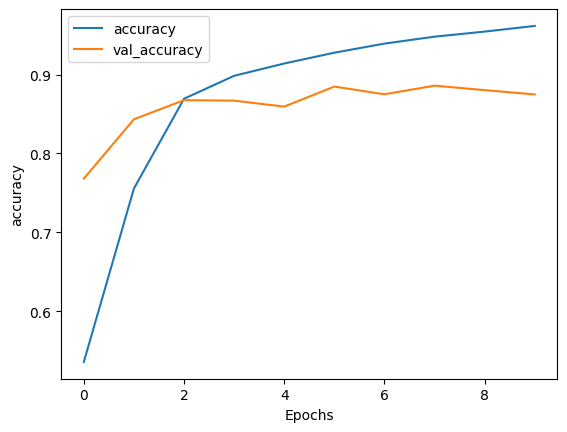

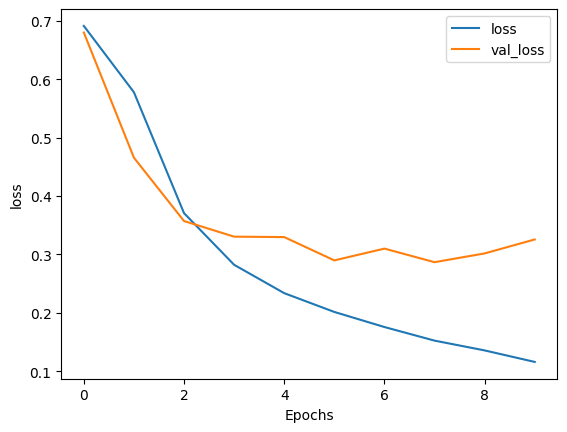

In [331]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [332]:
df['text'][90]

'this movie is one of the best and moving i have ever seen because of the terrible good performance of the main actress jennifer rubin as jamie harris who really makes you feel with her also the music by mark snow is wonderful'

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 27ms/step
[[0.39475954]
 [0.5995218 ]]
